In [25]:
#code of Interactive Quantum Classifier Inspired by Quantum Open System Theory
#LINK https://ieeexplore.ieee.org/document/9533917

#LINK https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9533917

#this code was written by Fernando Maciano de Paula Neto (fernando@cin.ufpe.br) together with Eduardo Barreto Brito (ebb2@cin.ufpe.br)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, haversine_distances
from scipy.spatial.distance import cityblock
from helpers.icq_methods import create_and_execute_classifier

In [27]:
VARY_INPUT = "input"
VARY_WEIGHT = "weight"
VARY_BOTH = "both"
DIFFERENT_VARIATIONS = [VARY_INPUT, VARY_WEIGHT, VARY_BOTH]

In [28]:
def generate_many_points(n_points, n_dimensional, scale=0.5, varied_part=VARY_INPUT, distance_func=euclidean_distances):
  list_of_x = []
  list_of_y = []
  list_of_z = []
  
  for i in range(n_points):
    # We need to study what happens when we variate different things
    if varied_part == VARY_INPUT:
      i_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
      w_n = scale*np.ones((n_dimensional,))
    elif varied_part == VARY_WEIGHT:
      i_n = scale*np.ones((n_dimensional,))
      w_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
    elif varied_part == VARY_BOTH:
      i_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
      w_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
    
    distance = distance_func([i_n], [w_n])
    z,p_cog = create_and_execute_classifier(i_n, w_n)
    if (distance_func == cityblock):
      list_of_x.append(distance)
    else:
      list_of_x.append(distance[0][0])
    list_of_y.append(p_cog.real)
    list_of_z.append(z)

  return list_of_x, list_of_y, list_of_z

In [29]:
def plot_graph(list_of_x, list_of_y):
    plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
    ax = plt.gca()
    ax.tick_params(axis='y', colors='red')
    ax.tick_params(axis='x', colors='red')
    plt.show()

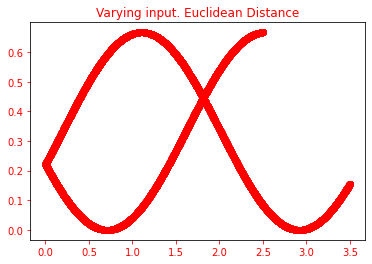

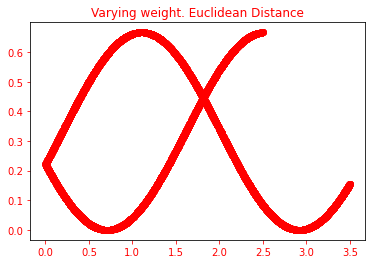

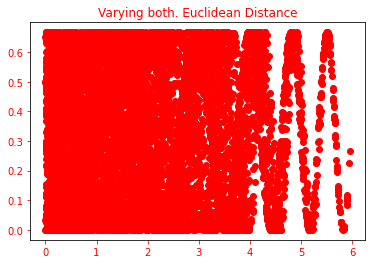

In [30]:
# First let's see only what happens when we change what we're trying to vary
for variation in DIFFERENT_VARIATIONS:
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, varied_part=variation)
    plt.title("Varying " + variation + ". Euclidean Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

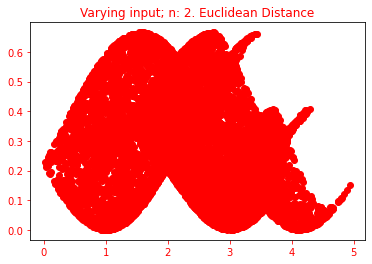

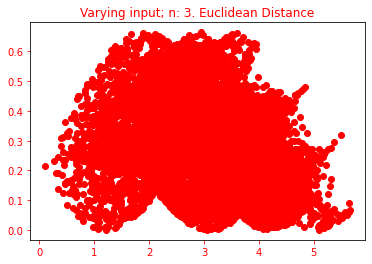

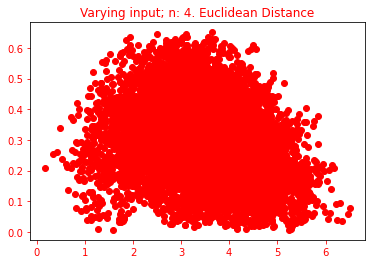

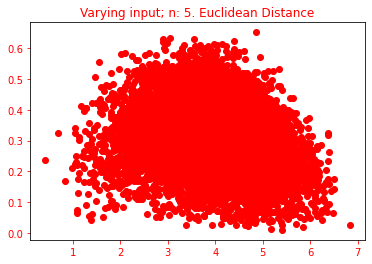

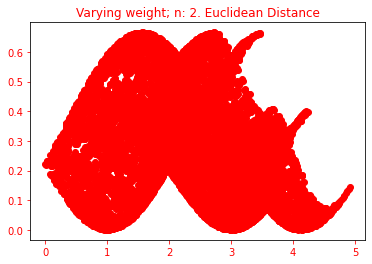

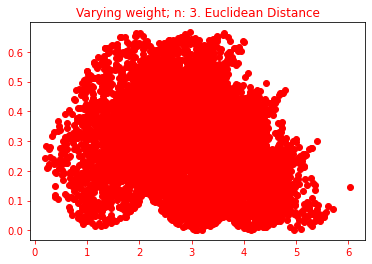

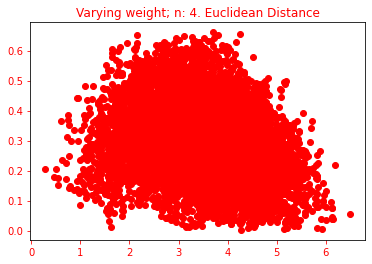

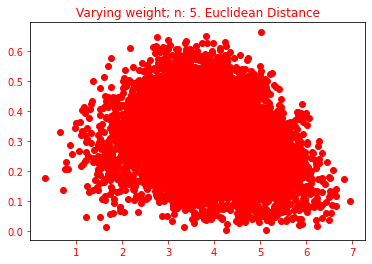

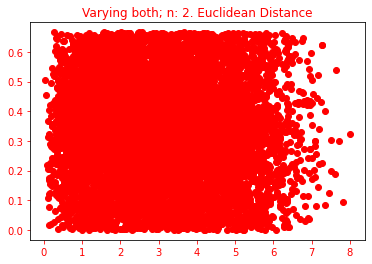

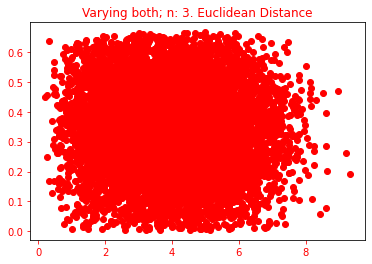

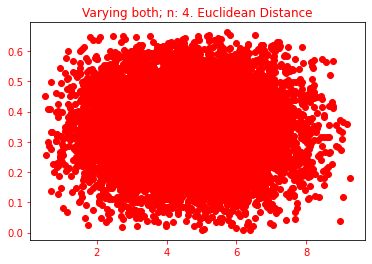

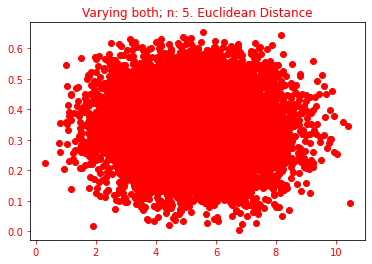

In [31]:
# Then we see what happens with different number of dimensions
for variation in DIFFERENT_VARIATIONS:
    for n in range(2, 6):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, n, varied_part=variation)
        plt.title("Varying " + variation + "; n: " + str(n) + ". Euclidean Distance", color = "red")
        plot_graph(list_of_x, list_of_y)

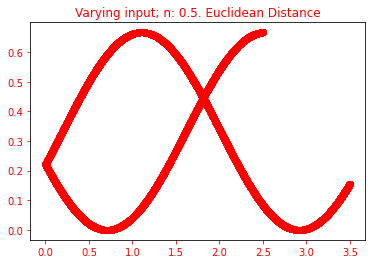

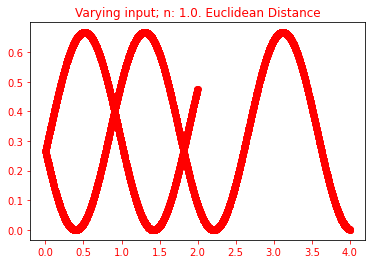

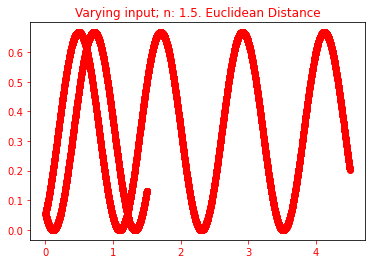

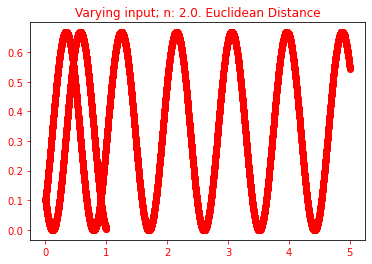

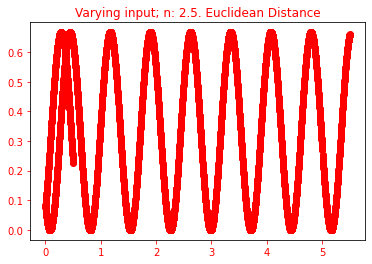

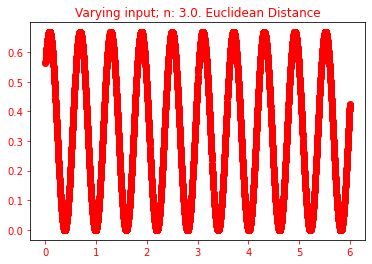

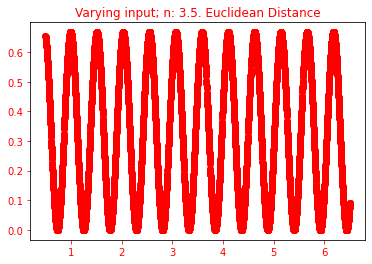

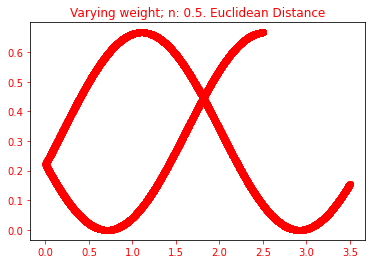

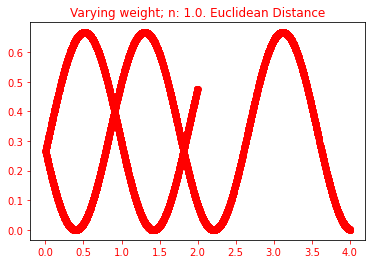

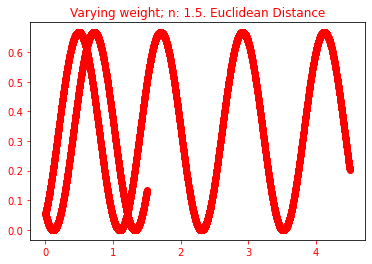

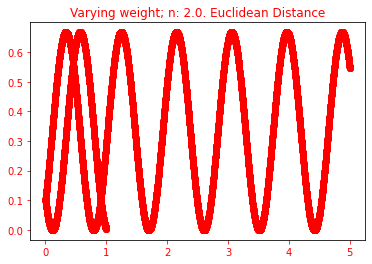

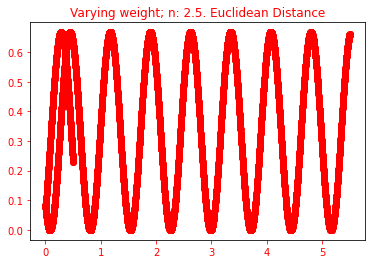

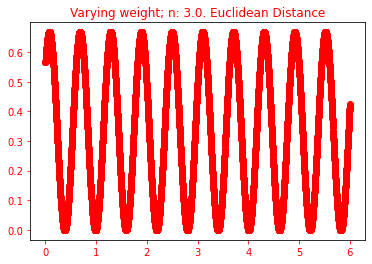

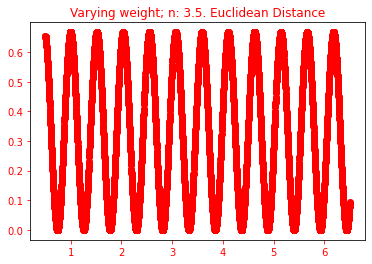

In [32]:
# Last thing we want to know is how the scale affects the points
for variation in [VARY_INPUT, VARY_WEIGHT]:
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, scale=n, varied_part=variation)
        plt.title("Varying " + variation + "; n: " + str(n) + ". Euclidean Distance", color = "red")
        plot_graph(list_of_x, list_of_y)

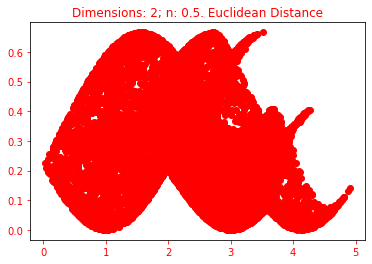

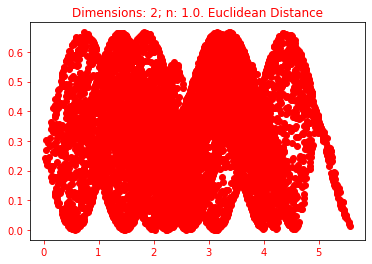

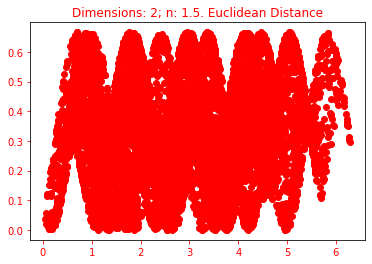

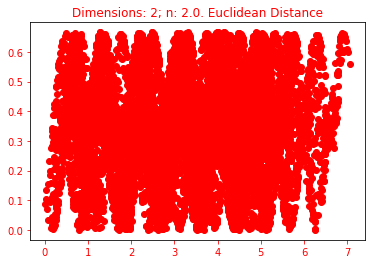

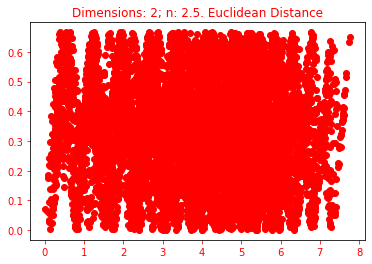

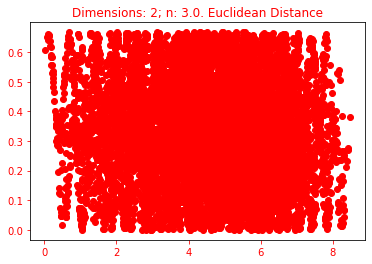

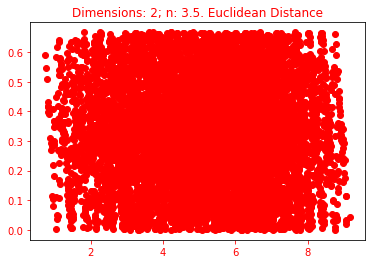

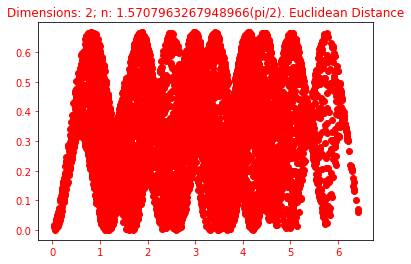

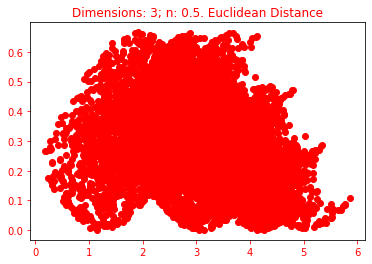

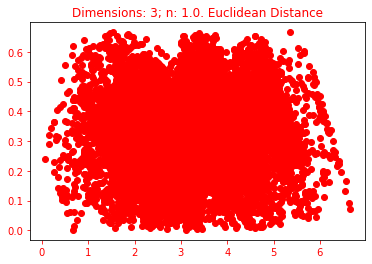

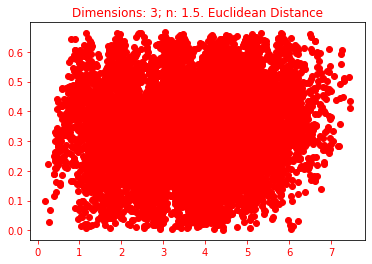

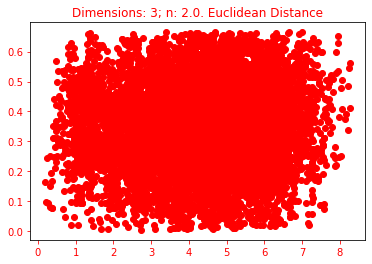

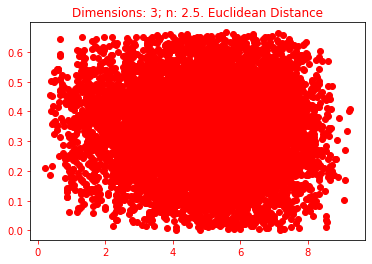

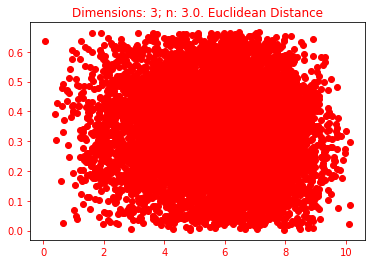

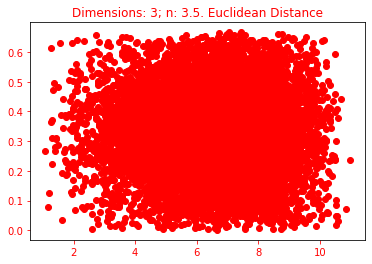

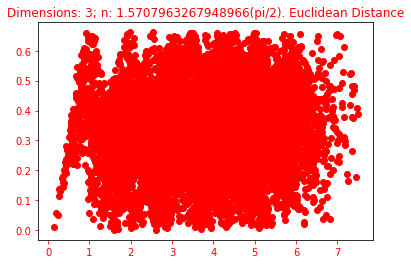

In [33]:
# We already know that varying input and varying weight is the same thing, lets 
# vary both scale and n of dimensions
for dimensions in range(2, 4):
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, varied_part=variation)
        plt.title("Dimensions: " + str(dimensions) + "; n: " + str(n) + ". Euclidean Distance", color = "red")
        plot_graph(list_of_x, list_of_y)
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2, varied_part=variation)
    plt.title("Dimensions: " + str(dimensions) + "; n: " + str(np.pi/2) + "(pi/2). Euclidean Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

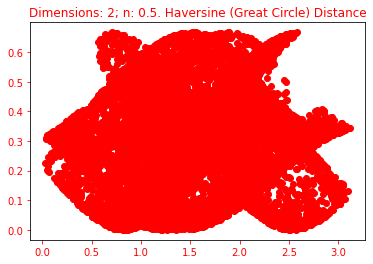

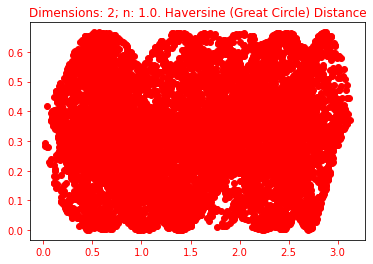

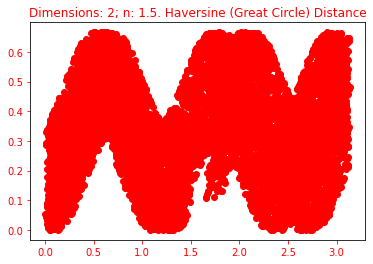

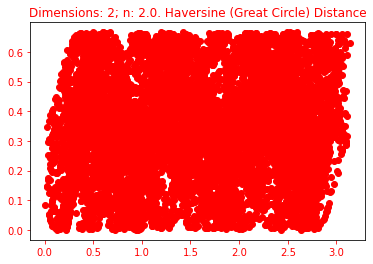

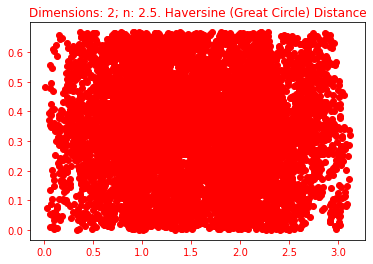

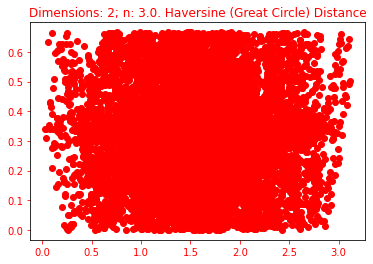

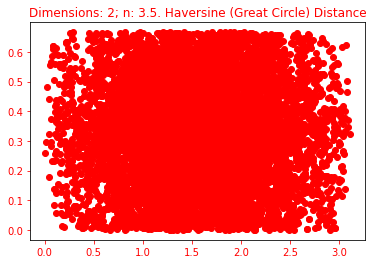

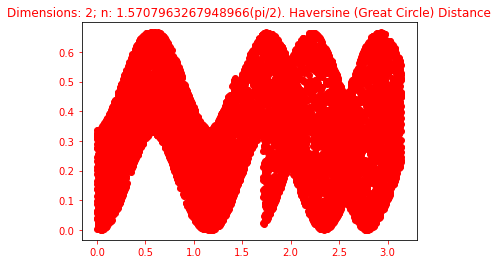

In [34]:
# What happens when we change the distance calculation?
# This one is known as great circle distance
for dimensions in range(2, 3):
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, varied_part=variation, distance_func=haversine_distances)
        plt.title("Dimensions: " + str(dimensions) + "; n: " + str(n) + ". Haversine (Great Circle) Distance", color = "red")
        plot_graph(list_of_x, list_of_y)
    
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2, varied_part=variation, distance_func=haversine_distances)
    plt.title("Dimensions: " + str(dimensions) + "; n: " + str(np.pi/2) + "(pi/2). Haversine (Great Circle) Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

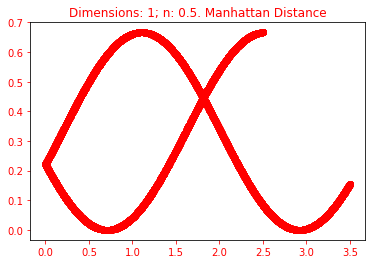

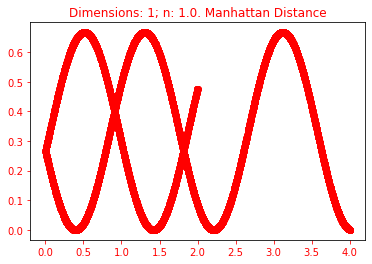

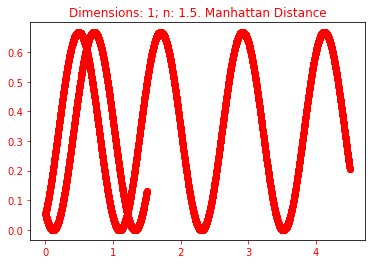

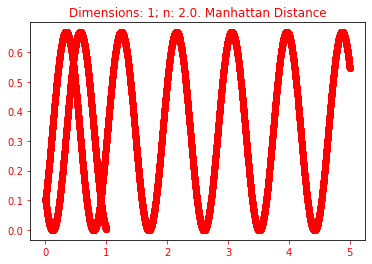

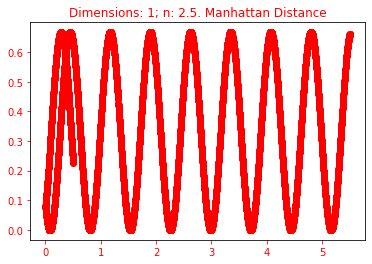

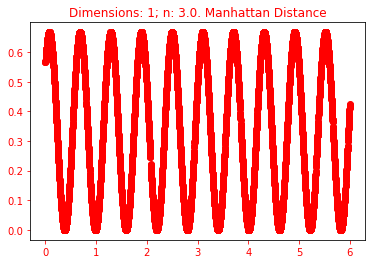

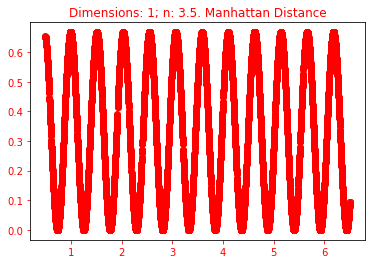

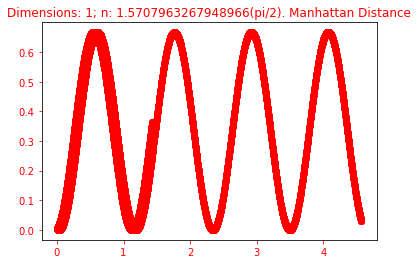

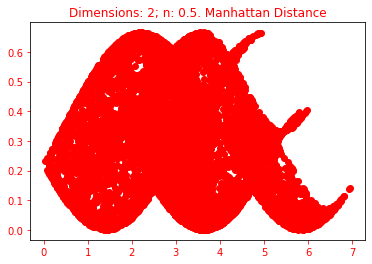

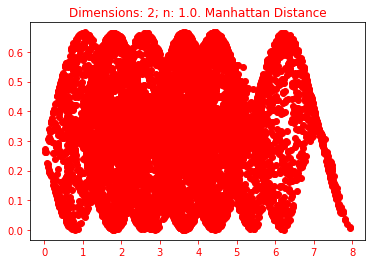

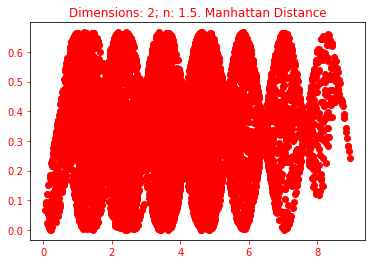

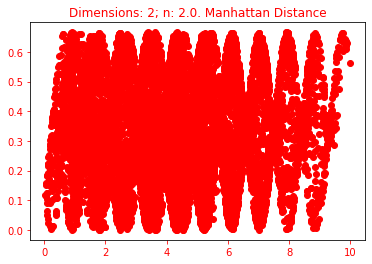

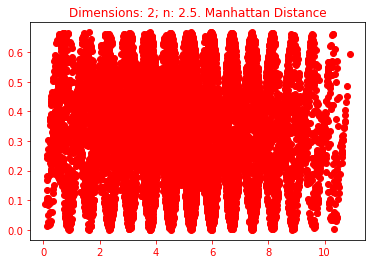

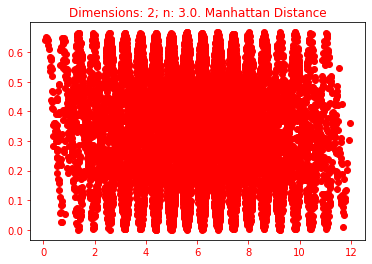

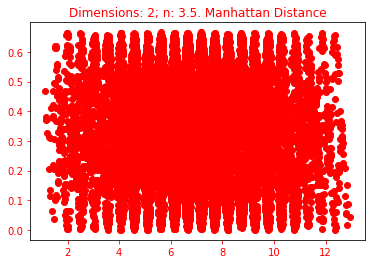

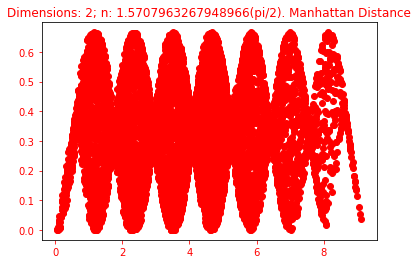

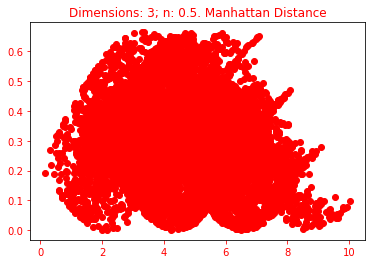

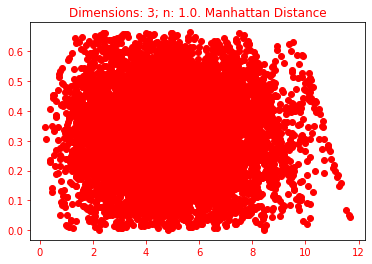

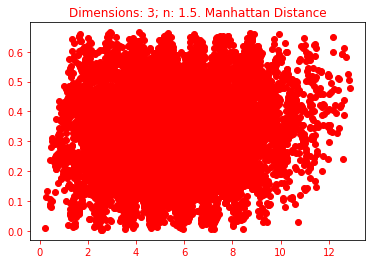

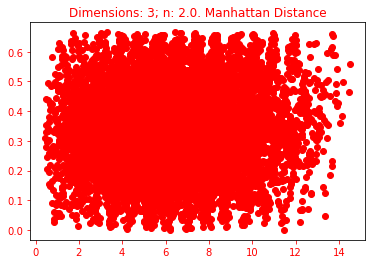

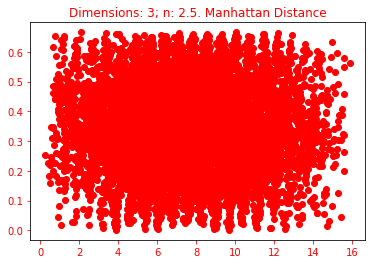

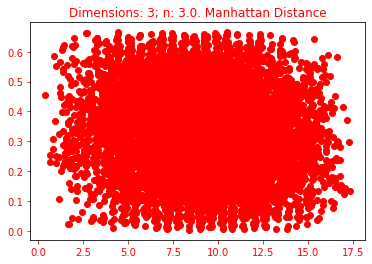

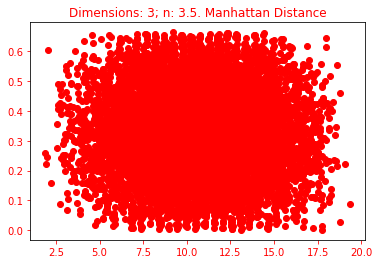

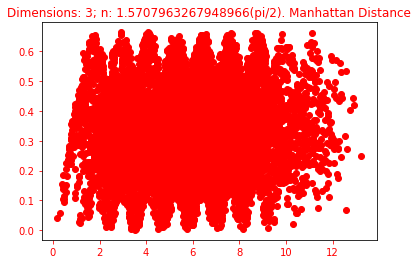

In [35]:
# What happens when we change the distance calculation? - Manthattan
for dimensions in range(1, 4):
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, varied_part=variation, distance_func=manhattan_distances)
        plt.title("Dimensions: " + str(dimensions) + "; n: " + str(n) + ". Manhattan Distance", color = "red")
        plot_graph(list_of_x, list_of_y)
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2, varied_part=variation, distance_func=manhattan_distances)
    plt.title("Dimensions: " + str(dimensions) + "; n: " + str(np.pi/2) + "(pi/2). Manhattan Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

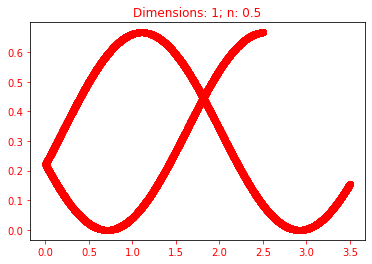

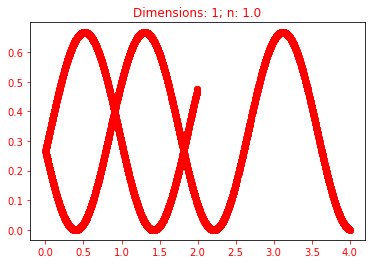

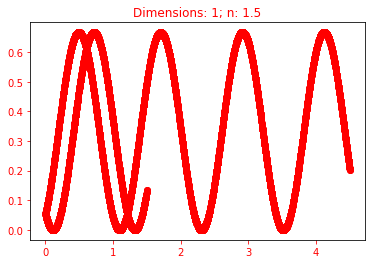

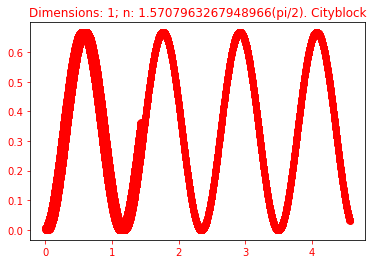

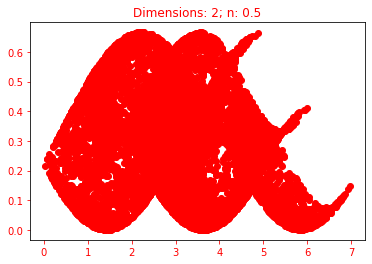

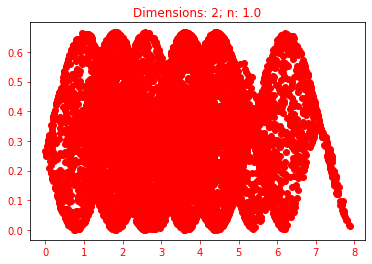

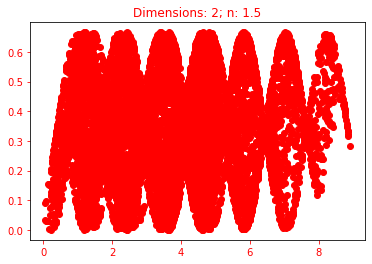

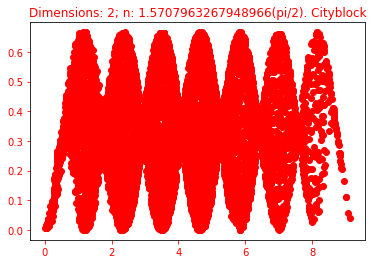

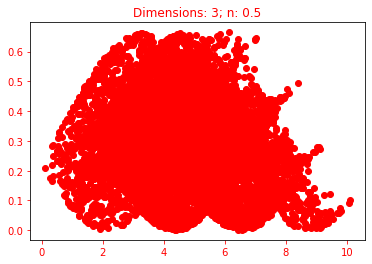

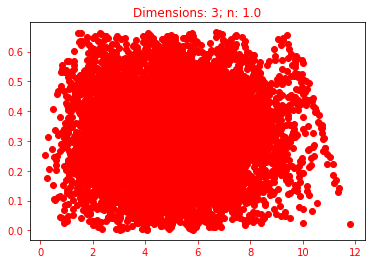

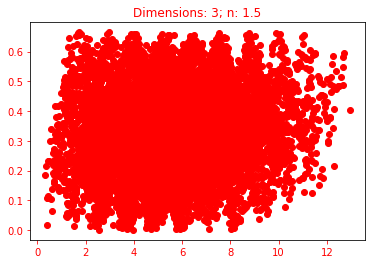

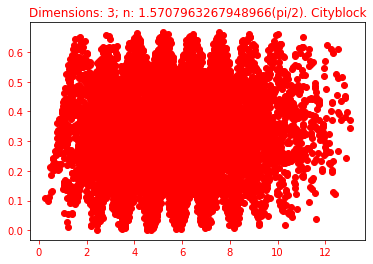

In [36]:
# What happens when we change the distance calculation? - Cityblock
for dimensions in range(1, 4):
    for n in np.arange(0.5, 2, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, varied_part=variation, distance_func=cityblock)
        plt.title("Dimensions: " + str(dimensions) + "; n: " + str(n), color = "red")
        plot_graph(list_of_x, list_of_y)
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2, varied_part=variation, distance_func=cityblock)
    plt.title("Dimensions: " + str(dimensions) + "; n: " + str(np.pi/2) + "(pi/2). Cityblock", color = "red")
    plot_graph(list_of_x, list_of_y)